In [3]:
import os
import struct
import numpy as np
def load_mnist(path, kind = 'train'):
    labels_path = os.path.join(path,
                               f'{kind}-labels.idx1-ubyte')
    images_path = os.path.join(path,
                               f'{kind}-images.idx3-ubyte')
    with open (labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II',
                                 lbpath.read(8))
        labels = np.fromfile(lbpath,
                             dtype=np.uint8)
    with open (images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack('>IIII',
                                 imgpath.read(16))
        images = np.fromfile(imgpath,
                             dtype=np.uint8).reshape(
                                 len(labels), 784)
        images = ((images / 255.) - .5) * 2 #нормализация значений пикселей (-1; 1)
        return images, labels   

In [5]:
X_train, y_train = load_mnist('data', kind = 'train')
print(X_train.shape)
X_test, y_test = load_mnist('data', kind = 't10k')
print(X_test.shape)

(60000, 784)
(10000, 784)


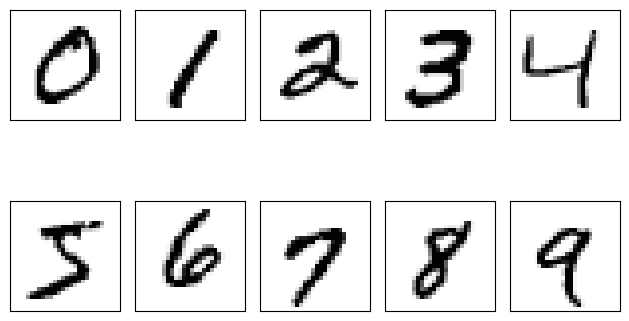

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, ncols=5,
                       sharex=True, sharey=True)
ax = ax.flatten()#"выпрямляет" массив
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()

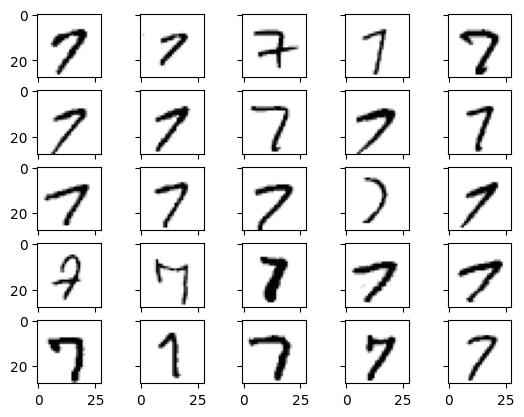

In [13]:
fig, ax = plt.subplots(nrows=5,
                       ncols=5,
                       sharex=True,
                       sharey=True)
ax = ax.flatten()
for i in range(25):
    img = X_train[y_train == 7][i].reshape(28, 28)
    ax[i].imshow(img, cmap="Greys")

In [14]:
np.savez_compressed('mnist_scaled.npz',
                    X_train=X_train,
                    y_train=y_train,
                    X_test=X_test,
                    y_test=y_test)

In [4]:
import numpy as np
mnist = np.load('mnist_scaled.npz')
mnist.files

['X_train', 'y_train', 'X_test', 'y_test']

In [5]:
X_train, y_train, X_test, y_test = [mnist[f] for f in mnist.files]

In [6]:
from neuralnet import NeuralNetMLP
nn = NeuralNetMLP(n_hidden=100,
                  l2=0.01,
                  epochs=200,
                  eta=0.0005,
                  minibatch_size=100,
                  shuffle=True,
                  seed=1)

In [7]:
nn.fit(X_train=X_train[:55000],
       y_train=y_train[:55000],
       X_valid=X_train[55000:],
       y_valid=y_train[55000:])

200/200 | Cost: 5065.78 | Train/Valid Acc.: 99.28%/97.98%  

In [9]:
import pickle
import os
dest = os.path.join('nn', 'pkl_objects')
if not os.path.exists(dest):
    os.makedirs(dest)
pickle.dump(nn,
            open(os.path.join(dest, 'nn.pkl'), 'wb'),
            protocol=4)

Text(0.5, 0, 'Эпохи')

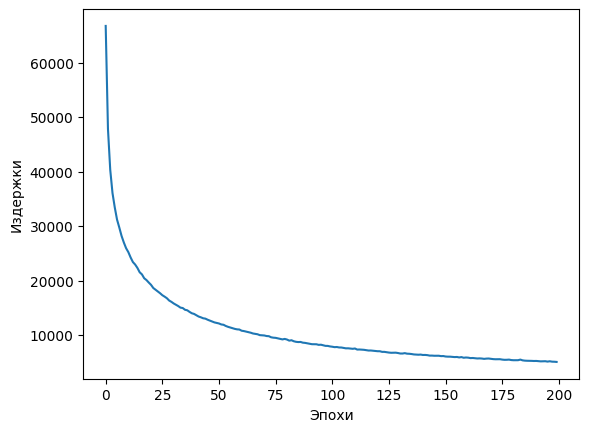

In [16]:
import matplotlib.pyplot as plt
plt.plot(range(nn.epochs), nn.eval_['cost'])
plt.ylabel("Издержки")
plt.xlabel('Эпохи')

In [14]:
nn = pickle.load(open(os.path.join('nn', 'pkl_objects', 'nn.pkl'), 'rb'))

Text(0.5, 0, 'Эпохи')

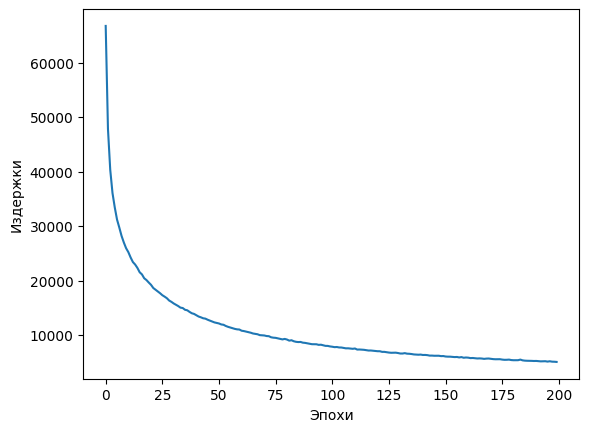

In [15]:
import matplotlib.pyplot as plt
plt.plot(range(nn.epochs), nn.eval_['cost'])
plt.ylabel("Издержки")
plt.xlabel('Эпохи')

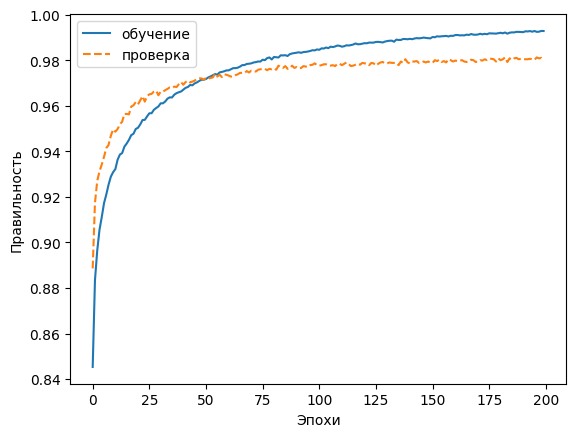

In [19]:
plt.plot(range(nn.epochs), nn.eval_["train_acc"], label = 'обучение')
plt.plot(range(nn.epochs), nn.eval_["valid_acc"], label = 'проверка', linestyle = '--')
plt.ylabel("Правильность")
plt.xlabel('Эпохи')
plt.legend(loc='best')
